### 순차데이터
- 텍스트 데이터 (ex: I am a boy) : 순서가 의미가 있다.   
- 시계열 데이터(ex: 1일 10도, 2일 8도)    

---
### 순환신경망(RNN: Recurrent Neuarl Network)

- IMDB(Internaet Movie Data Base)
- IMDB 구성 : Train Data(25000개중 긍정 12500개,부정 12500),Test Data(25000개중 긍정 12500,부정 12500)
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝이나 딥러닝에서는 데이터가 숫자로 구성되어 있어야 함으로 이런 단어들을 고유한 번호로 할당하여 사용

In [1]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500) # 500개단어만

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# train의 첫번째 문장의 Token 갯수
len(train_input[0])

218

In [4]:
len(train_input[1])

189

In [5]:
# 첫번째 댓글의 출력
print(train_input[0]) # 2는 500개 단어에 해당하지 않는 것을 의미 

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다. 
- 2는 선정한 단어 갯수에 포함되지 않는 단어를 표현한다.
- train_input 자체는 numpy 배열이나 댓글에 사용된 토큰수가 다르기 때문에 numpy 배열을 사용못하고     
python list를 사용한다

In [6]:
# train의 target 출력
print(train_target[:10])

[1 0 0 1 0 0 1 0 1 0]


In [7]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

In [8]:
# 각 리뷰마다 문장길이를 시각화

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


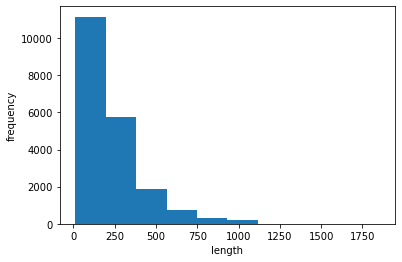

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

---
### Sequence Padding
- 전체 자릿수를 100으로 가정했을 경우 한문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100) # 위의 차트에서 100개 부분이 제일 많은것 같아 100개의 토큰만 사용
val_seq = pad_sequences(val_input,maxlen=100) # 검증데이터

In [11]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트 중 500개는 검증세트로 빠짐

In [12]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5]) 

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
# 순환 신경망 모델 만들기

In [15]:
from tensorflow import keras

In [16]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500))) # 8 : cell의 갯수, 500 :One-hotEncoding
model.add(keras.layers.Dense(1,activation='sigmoid'))

2022-07-22 12:13:05.327740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# One hot Encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [18]:
# one hot encoding 확인하기
print(np.sum(train_oh[0][0]))

1.0


In [19]:
val_oh = keras.utils.to_categorical(val_seq)
print(val_oh.shape)

(5000, 100, 500)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


<b>$500 * 8 + (8*8) + 8(bias) = 4072$</b>

In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-simplernn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    train_oh,
    train_target,
    epochs=100,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (val_oh, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 16s 47ms/step - loss: 0.7009 - accuracy: 0.4989 - val_loss: 0.6967 - val_accuracy: 0.5132
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6960 - accuracy: 0.5099 - val_loss: 0.6942 - val_accuracy: 0.5148
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6925 - val_accuracy: 0.5196
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6909 - accuracy: 0.5258 - val_loss: 0.6912 - val_accuracy: 0.5248
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6890 - accuracy: 0.5360 - val_loss: 0.6900 - val_accuracy: 0.5334
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6872 - accuracy: 0.5454 - val_loss: 0.6890 - val_accuracy: 0.5386
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6855 - accuracy: 0.5523 - val_loss: 0.6880 - val_ac

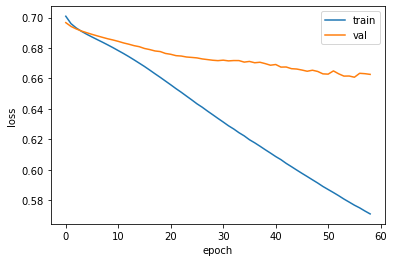

In [22]:
# 시각화 해보기 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [23]:
model.evaluate(val_oh,val_target)

157/157 [==============================] - 2s 15ms/step - loss: 0.6608 - accuracy: 0.6064


[0.6607856154441833, 0.6064000129699707]

---
### LSTM(Long Short Term Memory) 신경망 모델 구성하기
- 순환신경망의 셀로 이전 타입스텝의 샘플을 기억하고 있음

In [24]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100)) # Embedding : One hot encoding
model.add(keras.layers.LSTM(8)) # cell은 8개
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [25]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-lstm-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 12s 30ms/step - loss: 0.6925 - accuracy: 0.5271 - val_loss: 0.6917 - val_accuracy: 0.5508
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6900 - accuracy: 0.5882 - val_loss: 0.6881 - val_accuracy: 0.6206
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6831 - accuracy: 0.6431 - val_loss: 0.6766 - val_accuracy: 0.6582
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6455 - accuracy: 0.6635 - val_loss: 0.6075 - val_accuracy: 0.7098
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5818 - accuracy: 0.7390 - val_loss: 0.5718 - val_accuracy: 0.7442
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5545 - accuracy: 0.7606 - val_loss: 0.5481 - val_accuracy: 0.7584
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5329 - accuracy: 0.7662 - val_loss: 0.5307 - val_accurac

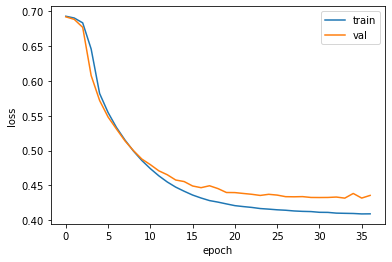

In [26]:
# 시각화 해보기 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
# 순환층에 드롭아웃 적용하기


In [27]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100)) # Embedding : One hot encoding
model.add(keras.layers.LSTM(8,dropout=0.3)) # cell은 8개
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [28]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-drop-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 12s 32ms/step - loss: 0.6924 - accuracy: 0.5279 - val_loss: 0.6917 - val_accuracy: 0.5482
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6900 - accuracy: 0.5784 - val_loss: 0.6884 - val_accuracy: 0.5914
Epoch 3/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6838 - accuracy: 0.6261 - val_loss: 0.6784 - val_accuracy: 0.6480
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6587 - accuracy: 0.6747 - val_loss: 0.6254 - val_accuracy: 0.7124
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5950 - accuracy: 0.7143 - val_loss: 0.5768 - val_accuracy: 0.7186
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5614 - accuracy: 0.7336 - val_loss: 0.5499 - val_accuracy: 0.7392
Epoch 7/100
313/313 [==============================] - 10s 30ms/step - loss: 0.5341 - accuracy: 0.7532 - val_loss: 0.5266 - val_acc

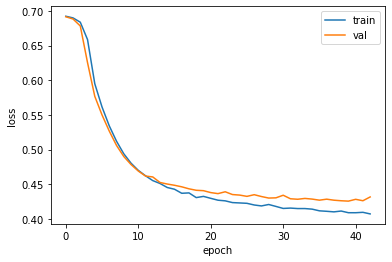

In [29]:
# 시각화 해보기 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
# 두 개의 층을 연결하기

In [30]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16, input_length=100)) # Embedding : One hot encoding
model.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True)) # cell은 8개
model.add(keras.layers.LSTM(8,dropout=0.3)) # 모든 타입스텝의 은닉상태를 출력하려면 retrun_sequence=True하여야한다.
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-2rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 26s 66ms/step - loss: 0.6925 - accuracy: 0.5365 - val_loss: 0.6920 - val_accuracy: 0.5322
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6892 - accuracy: 0.5901 - val_loss: 0.6857 - val_accuracy: 0.6344
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6749 - accuracy: 0.6521 - val_loss: 0.6601 - val_accuracy: 0.6748
Epoch 4/100
313/313 [==============================] - 20s 62ms/step - loss: 0.6224 - accuracy: 0.6930 - val_loss: 0.5779 - val_accuracy: 0.7200
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5505 - accuracy: 0.7280 - val_loss: 0.5316 - val_accuracy: 0.7426
Epoch 6/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5204 - accuracy: 0.7497 - val_loss: 0.5070 - val_accuracy: 0.7560
Epoch 7/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5010 - accuracy: 0.7630 - val_loss: 0.4924 - val_ac

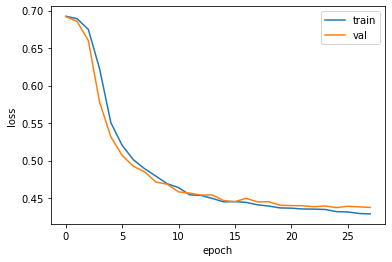

In [32]:
# 시각화 해보기 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전

In [33]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16, input_length=100)) # Embedding : One hot encoding
model.add(keras.layers.GRU(8)) # 자동으로 dropout을 함 
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-gru-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights= True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64, # mini batch 경사 하강법
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6920 - val_accuracy: 0.5408
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6901 - accuracy: 0.5692 - val_loss: 0.6893 - val_accuracy: 0.5658
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6862 - accuracy: 0.5993 - val_loss: 0.6848 - val_accuracy: 0.5930
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6802 - accuracy: 0.6151 - val_loss: 0.6781 - val_accuracy: 0.6146
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6713 - accuracy: 0.6309 - val_loss: 0.6682 - val_accuracy: 0.6306
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6582 - accuracy: 0.6428 - val_loss: 0.6542 - val_accuracy: 0.6424
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6397 - accuracy: 0.6567 - val_loss: 0.6339 - val_ac

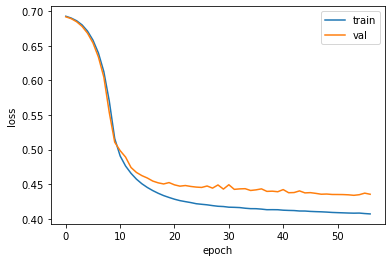

In [35]:
# 시각화 해보기 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()